## Preprocessing

- Corresponds to lectures 2-4

#### Some Definitions

- 4-Adjacency and 8-Adjacency:

<img src="https://www.researchgate.net/publication/329579183/figure/fig5/AS:702867979661313@1544588193288/4-and-8-adjacency-a-4-neighborhood-and-b-8-neighborhood.ppm">

- A continued sequence of pixel locations `(x,y)` is called a path or curve in the image
- A region is a set of pixels where there is a path between any two pixels
- Border or Contour is a set of pixels in region R where one or more neighbors come from outside of R

<img width=600 src="https://www.researchgate.net/publication/366225546/figure/fig2/AS:11431281107262141@1670990628520/Images-of-blob-regions-at-different-iterations-of-INRG-The-original-images-a-and.jpg">

### 🤹 Image Processing Techniques

#### Greyscale Transformation 
- Usually weighted average of RGB
- Useful when the features to extracts or classification task is independent of colors

shape was (400, 600, 3)
shape now is (400, 600)
It's now from 0 to 1: 0.05623333333333333


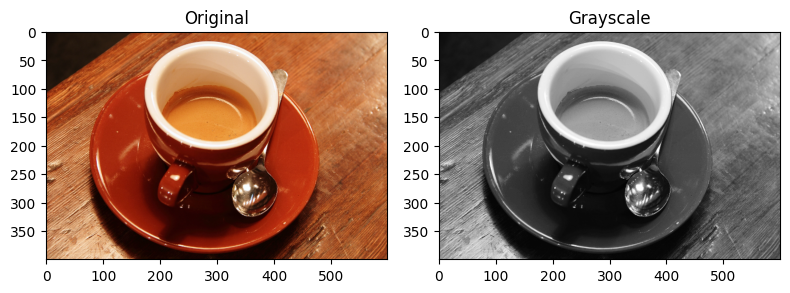

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski
from skimage import data

# 1. Load an image from Scikit-Image
original = data.coffee()
print("shape was", original.shape)

# 2. Convert to gray with rgb2gray
grayscale = ski.color.rgb2gray(original)
print("shape now is", grayscale.shape)
print("It's now from 0 to 1:", grayscale[0,0])

# Plot
def plot_change(img_before, img_after, effect):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    ax = axes.ravel()
    ax[0].imshow(img_before, cmap=plt.cm.gray if effect in ["Threshold", "Edge"] else "jet")
    ax[0].set_title("Original")
    ax[1].imshow(img_after, cmap=plt.cm.gray if effect in ["Grayscale", "Threshold", "Edge"]  else "jet")
    ax[1].set_title(effect)
    fig.tight_layout()
    plt.show()
plot_change(original, grayscale, "Grayscale")

#### Negative Transformation

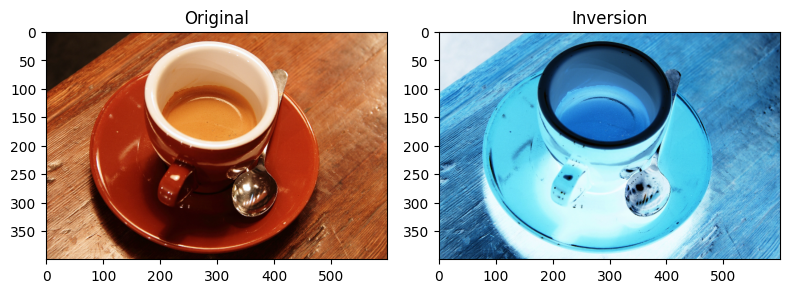

In [3]:
plot_change(original, 255-original, "Inversion")

#### Contrast Adjustment

I.e., stretching the histogram so it takes more colors

- Logarithmic: $x'=Clog(x+1)$ for each pixel $x$
- The logarithm makes small values higher 


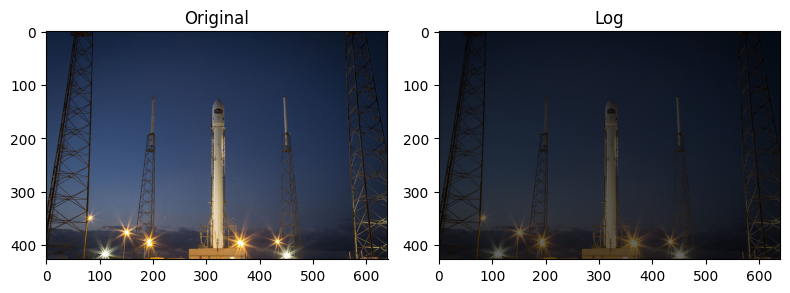

In [6]:
# Load an example image
img = data.rocket()

# Logarithmic Adjustment
log_img = ski.exposure.adjust_log(img, gain=0.4)        # gain = C
plot_change(img, log_img, "Log")

You can check piece-wise linear and exponential (gamma) transformations $x '=Cx^{γ}$ as well to help get the constrast of your image right.

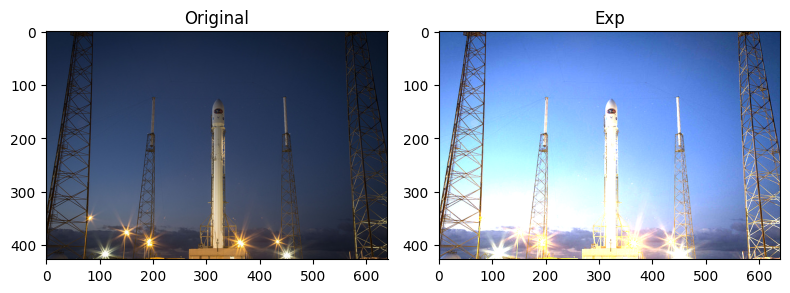

In [8]:
# Gamma Adjustment
log_img = ski.exposure.adjust_gamma(img, gain=3.0)        
plot_change(img, log_img, "Exp")

**Histogram Equalization is one algorithm that "literally" stretches the histogram:**
- Basic Idea  :Builds a mapping function from original histogram domain to the entire `0-255` domain (redistribution)

<img src="https://i.imgur.com/EtTwpTw.png" width=700>

/opt/anaconda3/envs/M1/lib/python3.9/site-packages/skimage/_shared/utils.py:316: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


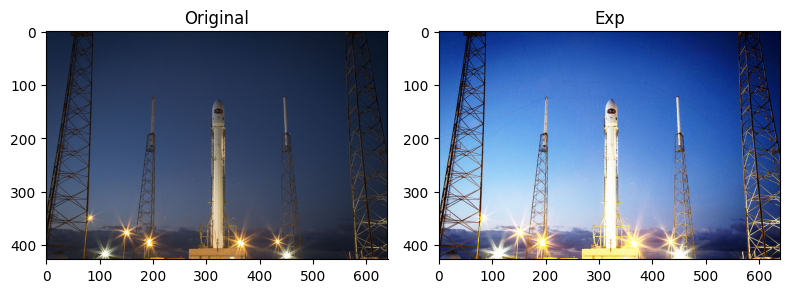

In [9]:
img_eq = ski.exposure.equalize_hist(img)
plot_change(img, img_eq, "Exp")

### Thresholding

- In some machine learning settings, all you need are just black and white 
- Typically want to isolate main object in image from background
- Basic thresholding is trivial to implement

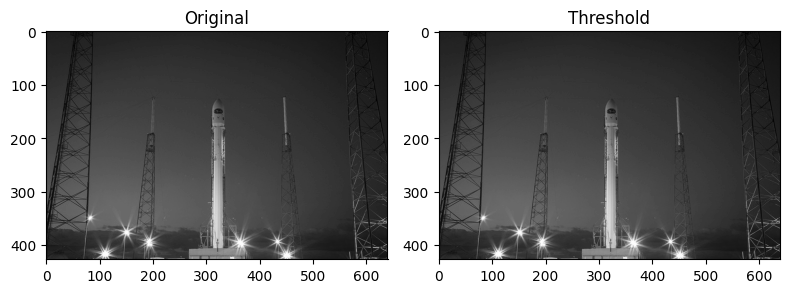

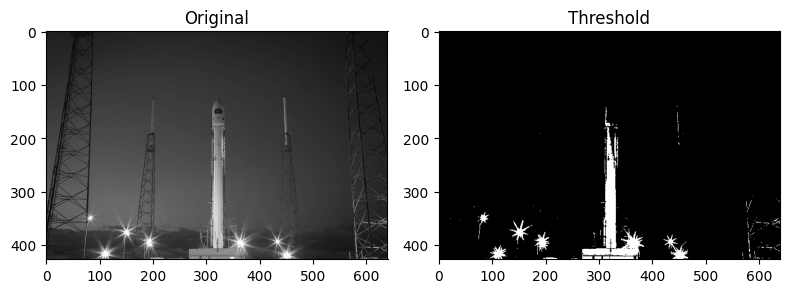

In [12]:
img = rgb2gray(data.rocket())
plot_change(img, img, "Threshold")
thres = 0.5
img_bin = img > thres
plot_change(img, img_bin, "Threshold")

- Choosing threshold is not trivial: want maximum separation between background and object(s)

- A theoretically optimal setting is the point between the the two histogram peaks representing object and background

<img src="https://www.researchgate.net/publication/272093231/figure/fig1/AS:350263073361920@1460520632253/Grey-level-histograms-approximated-by-two-normal-distributions-The-threshold-is-set-to.png">

chosen threshold: 0.720703125


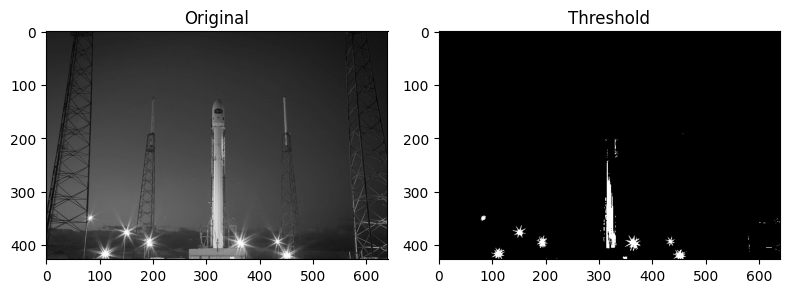

In [13]:
img = rgb2gray(data.rocket())
thresh = ski.filters.threshold_minimum(img) 
print("chosen threshold:", thresh)
img_bin = img > thresh
plot_change(img, img_bin, "Threshold")

- Another way to choose threshold is to use Otsu's method which aims to set the threshold to minimize the variances of each group

chosen threshold: 0.291015625


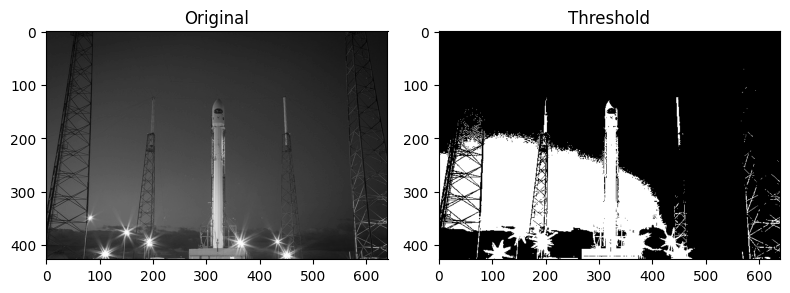

In [14]:
img = rgb2gray(data.rocket())
thresh = ski.filters.threshold_otsu(img) #threshold_minimum
print("chosen threshold:", thresh)
img_bin = img < thresh
plot_change(img, img_bin, "Threshold")

There are many other ways and `Scikit` image helps us try them in one shot:

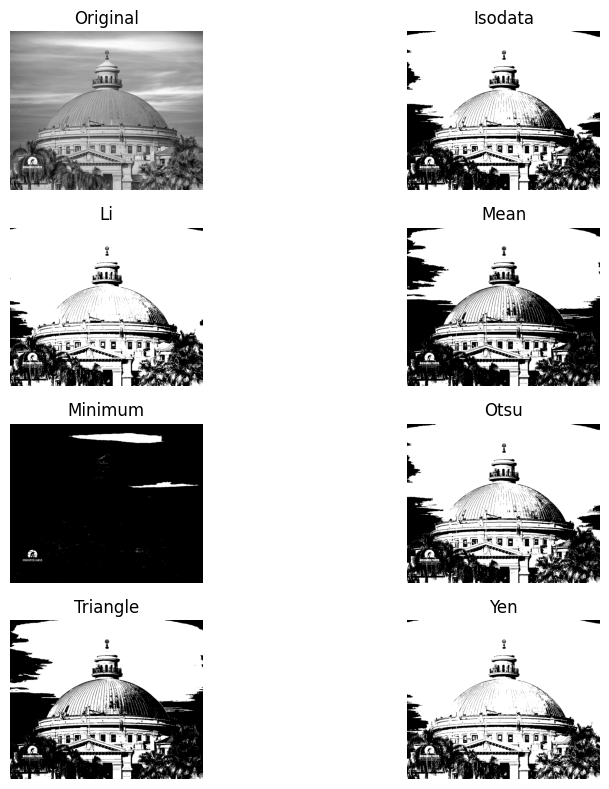

In [17]:
from skimage.filters import try_all_threshold

img = rgb2gray(ski.io.imread("./CU.jpeg"))
fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

Triangle and Yen seem to be best in this case.

Thresholding can also involve a range (e.g., $x'=1$ if $a<x<b$) and we will see an example of this later. A discrete instead of a binary image can be formed if there are multiple ranges (one for each discrete value).

### 🧮 Convolution

- Can implement a wide class of image transformations 
  - Most importantly smoothing and edge detection
- Is exactly the convolution you covered in signals: image is a 2D (multivariable) discrete signal 
  - Try all possible shifts and integrate the products (but in our case sum the products)
  - I.e., put filter on each possible pixel the compute the sum of products

<img src="https://miro.medium.com/v2/resize:fit:928/0*e-SMFTzO8r7skkpc">

<img src="https://miro.medium.com/v2/resize:fit:1400/0*fnHYnmwI_wmfwGAp.gif" width=640>

### 🎨 Smoothing
- Helps clear up noise:
- Or just blurring the image

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200703163814/noise1.png" width=400>

<img src="https://i.imgur.com/WtlBzI0.png" width=800>

- Intuitive as in this case convolution is equivalent to performing a weighted average on each pixel with its surroudnings.

/var/folders/nq/f_nplzp52qx_hrrhyg44xf4c0000gn/T/ipykernel_9969/3517634548.py:2: FutureWarning: `seed` is a deprecated argument name for `random_noise`. It will be removed in version 0.23. Please use `rng` instead.
  img = ski.util.random_noise(img, mode='gaussian', seed=None, clip=True)


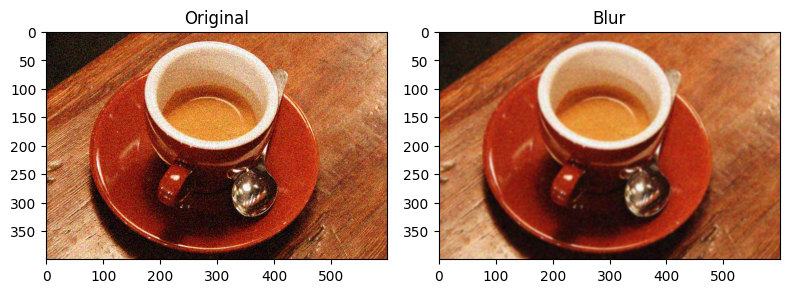

In [21]:
img = ski.data.coffee()
img = ski.util.random_noise(img, mode='gaussian', seed=None, clip=True)
filtered_img = ski.filters.gaussian(img, sigma=1.3, channel_axis=2)           
plot_change(img, filtered_img, "Blur")

There are other out-of-scope filters that can accomplish this more successfully as full (e.g., wavelet).

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


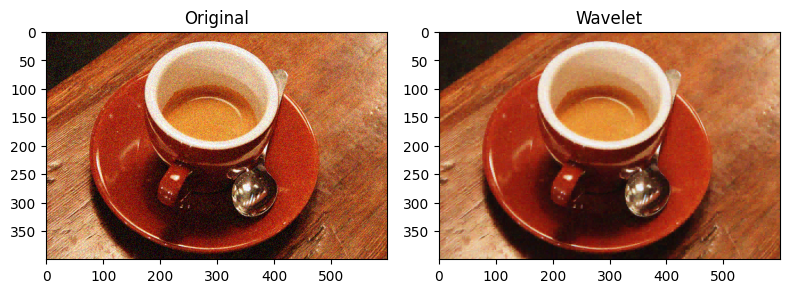

In [22]:
img = ski.data.coffee()
img = ski.util.random_noise(img, mode='gaussian', clip=True)
filtered_img = ski.restoration.denoise_wavelet(img, channel_axis=-1, rescale_sigma=True)
plot_change(img, filtered_img, "Wavelet")

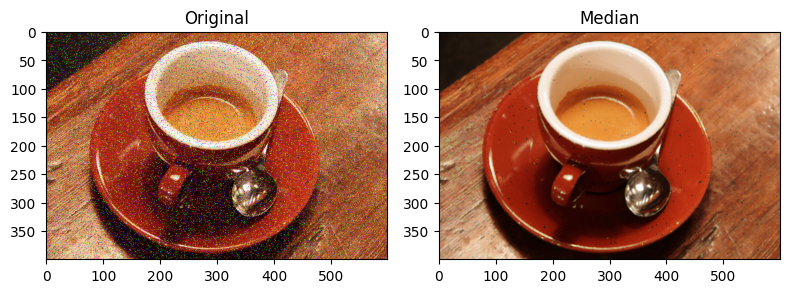

In [23]:
img = ski.data.coffee()
img = ski.util.random_noise(img, mode='s&p', clip=True, amount=0.1)
filtered_img = ski.filters.median(img)
plot_change(img, filtered_img, "Median")

Smoothing filters usually can hurt edges. A technique called "rotating mask" tries to place the point in each of its `nxn` locations and chooses the one with least variance.

Typically filter shape doesn't change but why not...

<img src="https://user.engineering.uiowa.edu/~dip/lecture/PreProcessing/f4.12.gif">

### 🕵🏻‍♂️ Edge Detection

**Prewitt Filters:**

Vertical Derivative at Point $\frac{dp}{dy}$:


| -1 | -1 | -1 |
|----|----|----|
| 0  |  0 |  0 |
| 1  |  1 |  1 |

Horizontal Derivative at Point $\frac{dp}{dx}$:


| -1 | 0 | 1 |
|----|---|---|
| -1 | 0 | 1 |
| -1 | 0 | 1 |

- Sobel filter is like Prewitt but gives the derivative at the center point more weight.
- There is also Robert's filter: looks at diagonal derivatives.

When both are computed at a point (pixel location), the gradient magnitude is given by:

$$G = \sqrt{(\frac{dp}{dx})^2 + (\frac{dp}{dy})^2}$$

Meanwhile, edge direction at the point can be found with $\theta=tan^{-1}(dx/dy)$

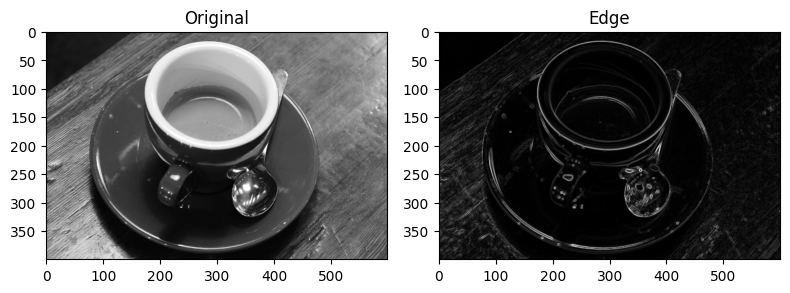

In [27]:
img = rgb2gray(ski.data.coffee())
edge_sobel = ski.filters.prewitt(img)       # threshold in gradient magnitude > 0.1
plot_change(img, edge_sobel, "Edge")

- There is also "Laplacian Filter" which obtains second derivatives (kind of like applying Sobel twice)

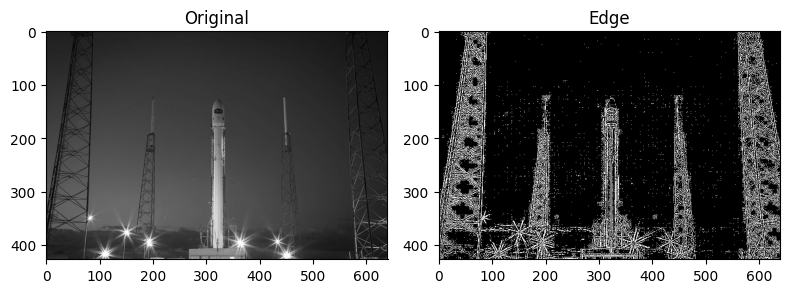

In [31]:
img = rgb2gray(ski.data.rocket())
edge_laplace = ski.filters.laplace(img) > 0.02        
plot_change(img, edge_laplace, "Edge")

Laplacian is usually too noisy (likely because it detects too much!). This is why the Laplacian of Gaussian exists:
- Can use one filter to apply both Laplacian and Gaussian together
- That filter convolves the Laplacian and Gaussian kernels
- Sadly not available in `skiimage.filters`

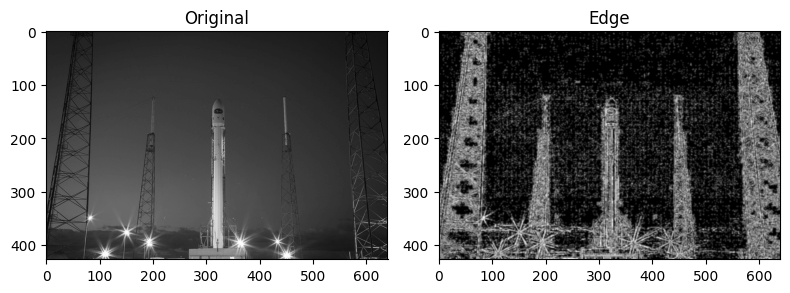

In [30]:
img = rgb2gray(ski.data.rocket())
edge_laplace = ski.filters.gaussian(ski.filters.laplace(img) > 0.01)
plot_change(img, edge_laplace, "Edge")

#### Canny Edge Detector

1. Apply Laplacian of Gaussian

2. Apply Non-maximum Suppression (i.e., multi-response edges) by setting some edge pixels under a kernel to zero

3. Apply double thresholding to map each pixel into: not edge, possible edge, is edge a<G<b

4. If an edge point does not have neighboring edges then set it to zero. (Hysterisis Thresholding)

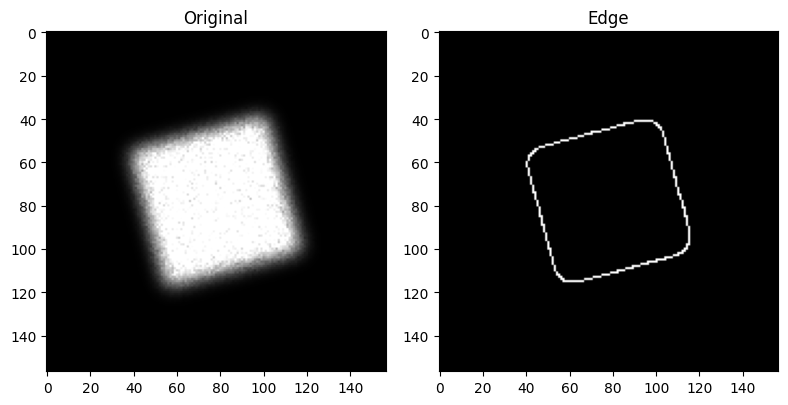

In [34]:
from scipy import ndimage as ndi

img = np.zeros((128, 128), dtype=float)
img[32:-32, 32:-32] = 1

img = ndi.rotate(img, 15, mode='constant')
img = ndi.gaussian_filter(img, 4)
img = ski.util.random_noise(img, mode='speckle', mean=0.1)

# Compute the Canny filter for two values of sigma
img_edges1 = ski.feature.canny(img)
img_edges2 = ski.feature.canny(img, sigma=3)
plot_change(img, img_edges2, "Edge")

Out of scope: a popular feature to extract related to edges is "HoG" or Histogram of Oriented Gradients.

In [ ]:
img = data.coffee()
hog_feat = ski.feature.hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(3, 3), channel_axis=2)
print(hog_feat.shape)

<img width=600 src="https://www.researchgate.net/publication/224331629/figure/fig2/AS:302846105931776@1449215546029/Schematic-overview-of-the-HOG-feature-vector-con-struction-using-cells-and-blocks.png">

We skipped the Fourier transform (but didn't really use it back then anyway).

- Helps implement convolution by multiplication
- Helps detect noise (high frequency components)